In [211]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

posts = pd.read_csv('/Users/jianingjin/Desktop/data analysis/Project/posts.csv')

/var/folders/6j/4hpwlvm53rb7c9ytxmxhmnv00000gn/T/ipykernel_76844/726175828.py:5: DtypeWarning: Columns (8,9,11,12,13,14,15,16,17,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  posts = pd.read_csv('/Users/jianingjin/Desktop/data analysis/Project/posts.csv')


In [172]:
# Filter out non-numeric values in the 'created_utc' column
posts = posts[pd.to_numeric(posts['created_utc'], errors='coerce').notnull()]

# Convert 'created_utc' to datetime format
posts['created_utc'] = pd.to_datetime(posts['created_utc'], unit='s')

In [173]:
#transfer object data to numeric data
object_cols = posts.select_dtypes(include='object').columns
print(object_cols)

Index(['subreddit', 'subreddit_id', 'id', 'title', 'selftext', 'author',
       'author_flair_text', 'num_comments', 'score', 'url', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 20'],
      dtype='object')


In [174]:
posts['num_comments'] = posts['num_comments'].apply(pd.to_numeric, errors='coerce').round(2)
posts['score'] = posts['score'].apply(pd.to_numeric, errors='coerce').round(2)

In [175]:
#glimpse of data
posts.head()

,subreddit,subreddit_id,id,created_utc,title,selftext,author,author_flair_text,num_comments,score,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,changemyview,t5_2w2s8,k49txn,2020-12-01 00:54:36,cmv: a character doesn't have to come out for ...,I see a lot of debate in some show fandoms whe...,00evilhag,NaN,26.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,changemyview,t5_2w2s8,k4a5kz,2020-12-01 01:12:27,cmv: pants with zippered side pockets should z...,I will first clarify that this is specific to ...,lighting214,NaN,18.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,changemyview,t5_2w2s8,k4askm,2020-12-01 01:47:15,cmv: regardless of how you feel you climate ch...,"With fossil fuels running out, pollution, and ...",liviss36,NaN,253.0,1339.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,changemyview,t5_2w2s8,k4b12d,2020-12-01 02:00:20,cmv: robert deniro is undermining his legacy b...,DeNiro’s starting to look like a hypocritical ...,[deleted],NaN,35.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,changemyview,t5_2w2s8,k4bkrk,2020-12-01 02:31:05,cmv: subreddits that allow flaired users only ...,"So some subreddits, like r/conservative , allo...",Sarahneth,NaN,39.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
posts['score'].describe().round(2)

count    80048.00
mean       138.91
std        905.52
min          0.00
25%          1.00
50%          9.00
75%         29.00
max      63689.00
Name: score, dtype: float64

In [177]:
posts['num_comments'].describe().round(2)

count    80048.00
mean        88.35
std        161.57
min         10.00
25%         27.00
50%         48.00
75%         87.00
max       6951.00
Name: num_comments, dtype: float64

In [178]:
#Descriptive Stats

# Group by year
grouped_posts_year = posts.groupby([posts['created_utc'].dt.year])

# Calculate sum and mean of score for each year
sum_score_year = grouped_posts_year['score'].sum()
mean_score_year = grouped_posts_year['score'].mean()

# Calculate sum and mean of num_comments for each year
sum_comments_year = grouped_posts_year['num_comments'].sum()
mean_comments_year = grouped_posts_year['num_comments'].mean()

# Calculate sum and mean of num_comments for each year
num_posts_year = grouped_posts_year['id'].count()

# Print the results
print("Sum of scores by year:\n", sum_score_year)
print("\nMean of scores by year:\n", mean_score_year)
print("\nSum of comments by year:\n", sum_comments_year)
print("\nMean of comments by year:\n", mean_comments_year)
print("\nNumber of Posts by year:\n", num_posts_year)


Sum of scores by year:
 created_utc
2013     372681.0
2014     515486.0
2015     465139.0
2016     460766.0
2017     736839.0
2018    1201604.0
2019    1191414.0
2020    2736211.0
2021    2420689.0
2022    1019019.0
Name: score, dtype: float64

Mean of scores by year:
 created_utc
2013     40.694584
2014     48.616995
2015     64.710490
2016     72.940636
2017     92.024354
2018    122.700296
2019    160.179349
2020    312.674094
2021    319.816224
2022    195.064893
Name: score, dtype: float64

Sum of comments by year:
 created_utc
2013    593914.0
2014    779004.0
2015    545060.0
2016    498763.0
2017    641585.0
2018    801516.0
2019    651733.0
2020    803622.0
2021    958351.0
2022    798733.0
Name: num_comments, dtype: float64

Mean of comments by year:
 created_utc
2013     64.851933
2014     73.470150
2015     75.829160
2016     78.955675
2017     80.128013
2018     81.845808
2019     87.622076
2020     91.832019
2021    126.615273
2022    152.896822
Name: num_comments, dtype:

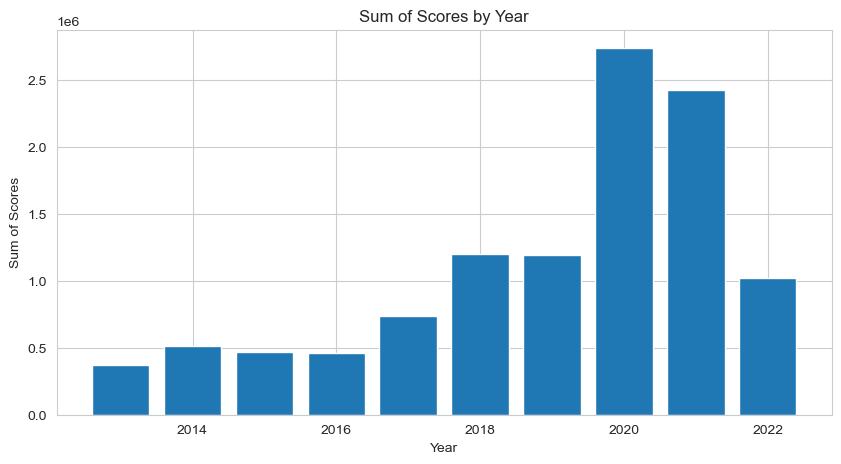

In [179]:
#Visualize the Results

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

plt.figure(figsize=(10,5))
plt.bar(sum_score_year.index, sum_score_year.values)
plt.title("Sum of Scores by Year")
plt.xlabel("Year")
plt.ylabel("Sum of Scores")
plt.show()

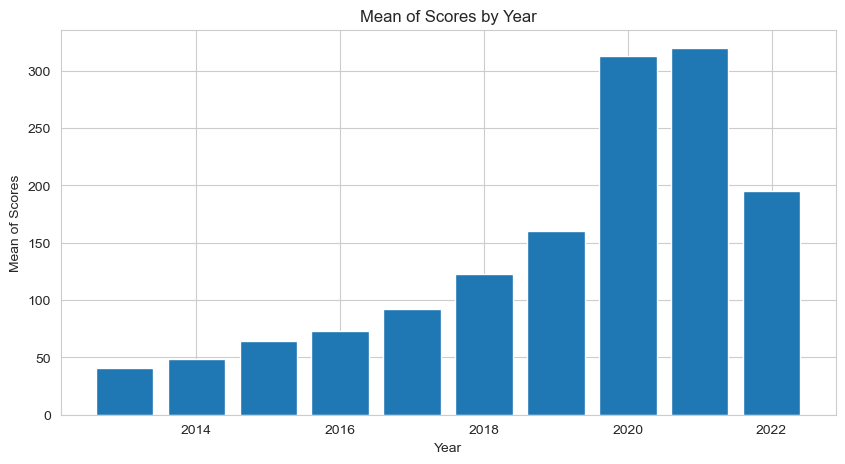

In [180]:
plt.figure(figsize=(10,5))
plt.bar(mean_score_year.index, mean_score_year.values)
plt.title("Mean of Scores by Year")
plt.xlabel("Year")
plt.ylabel("Mean of Scores")
plt.show()

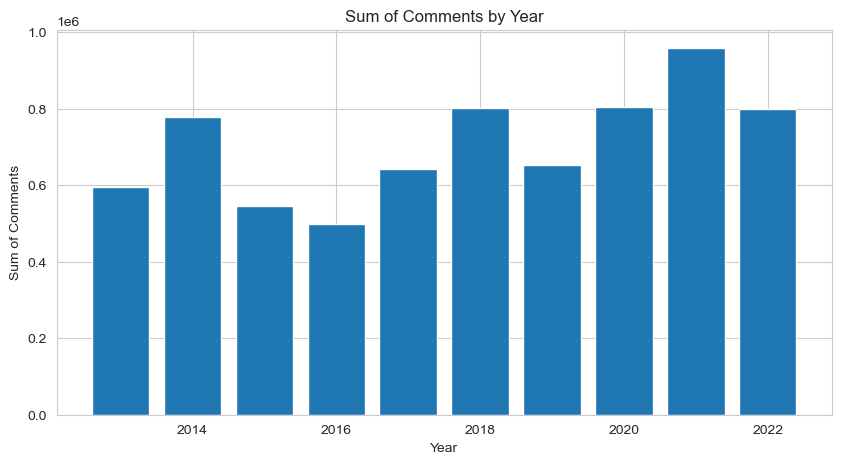

In [181]:
plt.figure(figsize=(10,5))
plt.bar(sum_comments_year.index, sum_comments_year.values)
plt.title("Sum of Comments by Year")
plt.xlabel("Year")
plt.ylabel("Sum of Comments")
plt.show()

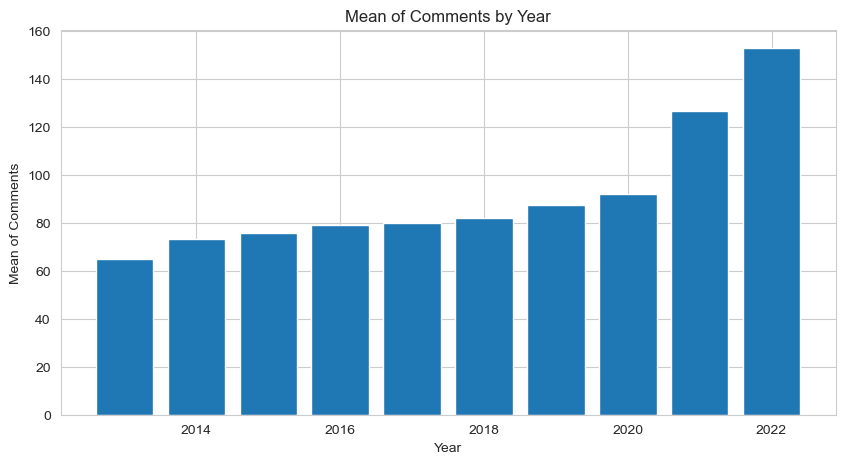

In [182]:
plt.figure(figsize=(10,5))
plt.bar(mean_comments_year.index, mean_comments_year.values)
plt.title("Mean of Comments by Year")
plt.xlabel("Year")
plt.ylabel("Mean of Comments")
plt.show()

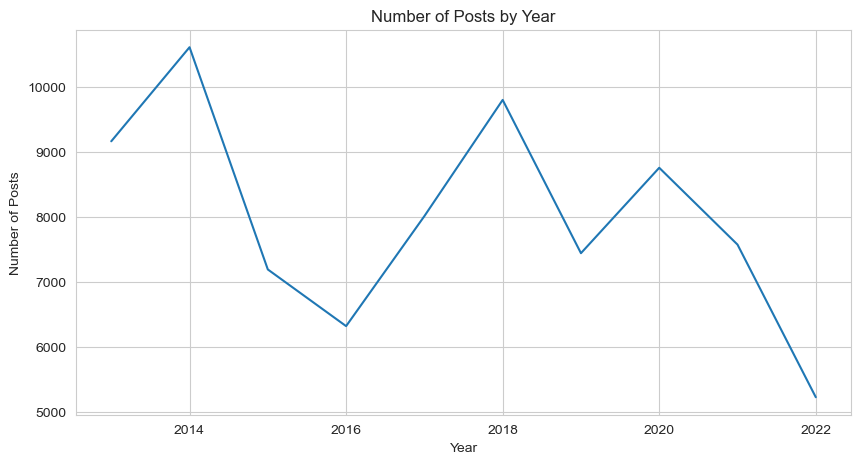

In [183]:
plt.figure(figsize=(10,5))
plt.plot(num_posts_year.index, num_posts_year.values)
plt.title("Number of Posts by Year")
plt.xlabel("Year")
plt.ylabel("Number of Posts")
plt.show()

In [184]:
# Group by year and month
grouped_posts_month = posts.groupby([posts['created_utc'].dt.year, posts['created_utc'].dt.month])

# Calculate sum and mean of score for each month
sum_score_month = grouped_posts_month['score'].sum()
mean_score_month = grouped_posts_month['score'].mean()

# Calculate sum and mean of num_comments for each month
sum_comments_month = grouped_posts_month['num_comments'].sum()
mean_comments_month = grouped_posts_month['num_comments'].mean()

# Calculate sum and mean of num_comments for each month
num_posts_month = grouped_posts_month['id'].count()

# Print the results
print("Sum of scores by month:\n", sum_score_month)
print("\nMean of scores by month:\n", mean_score_month)
print("\nSum of comments by month:\n", sum_comments_month)
print("\nMean of comments by month:\n", mean_comments_month)
print("\nNumber of Posts by month:\n", num_posts_month)

Sum of scores by month:
 created_utc  created_utc
2013         1                212.0
             2               2187.0
             3               5991.0
             4              18929.0
             5              35043.0
                             ...   
2022         8              82059.0
             9              80696.0
             10             89490.0
             11             79760.0
             12             69262.0
Name: score, Length: 120, dtype: float64

Mean of scores by month:
 created_utc  created_utc
2013         1               14.133333
             2               19.353982
             3               22.354478
             4               32.468268
             5               29.300167
                               ...    
2022         8              169.193814
             9              236.645161
             10             231.839378
             11             240.966767
             12             182.749340
Name: score, Length: 120, dtype:

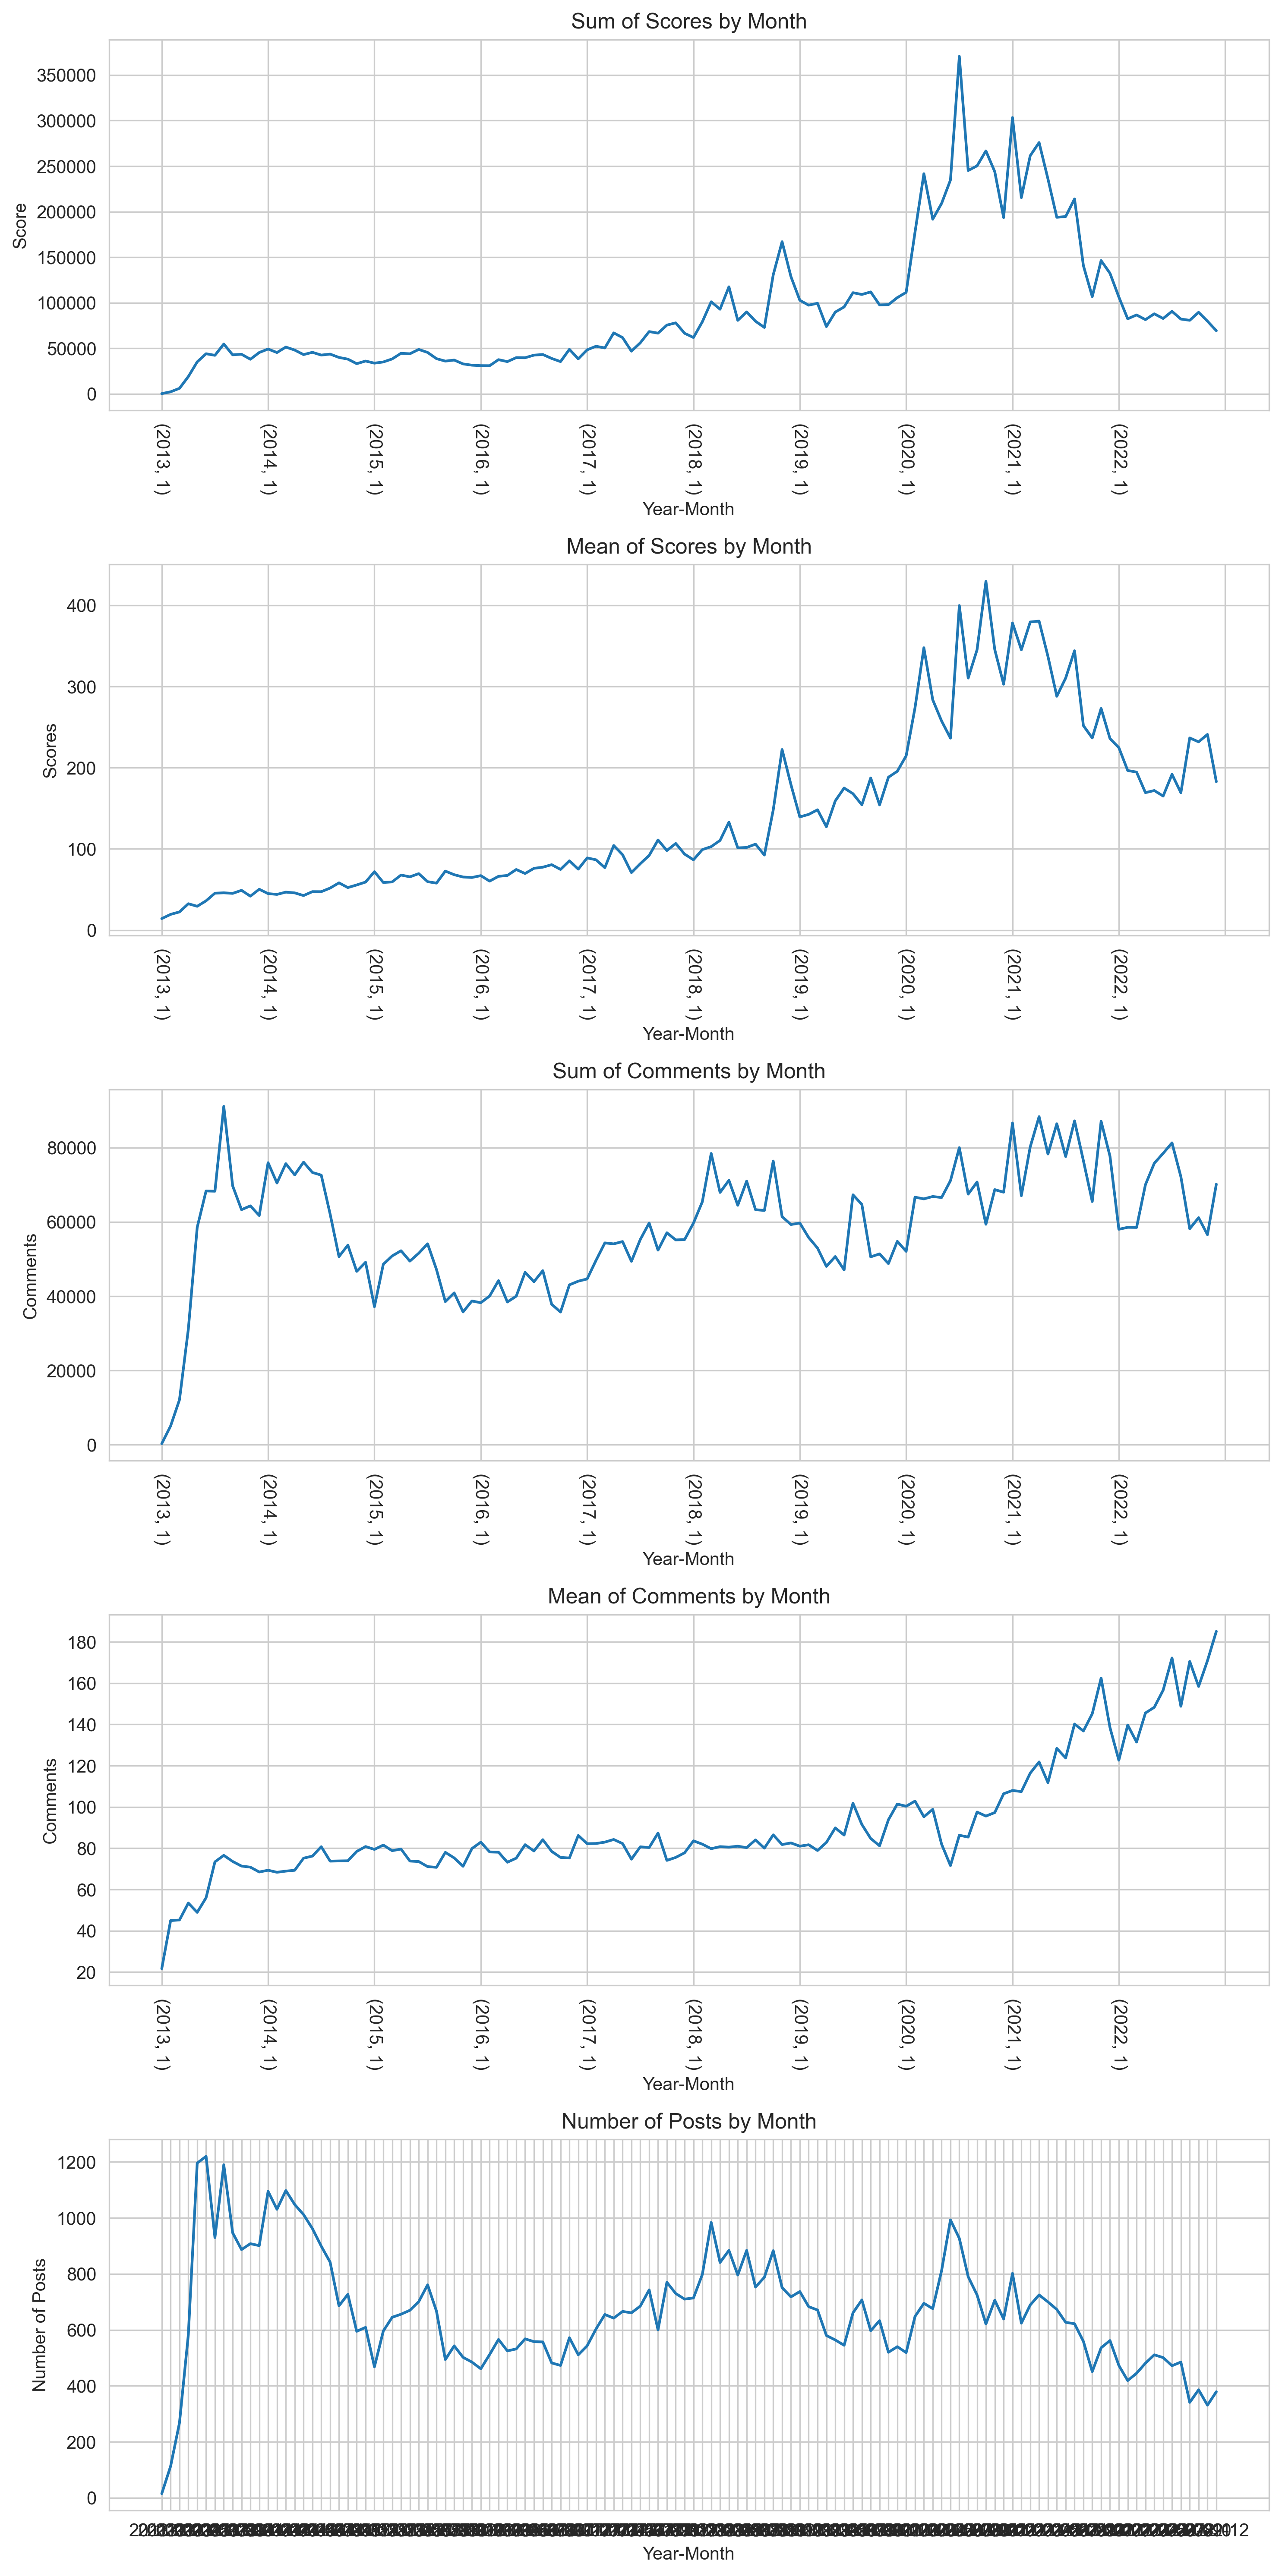

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 20), dpi=300)

# Create a list of year-month strings
year_month = [f"{y}-{m:02}" for y, m in sum_score_month.index]

# Plot sum of scores by month
axes[0].plot(year_month, sum_score_month.values)
axes[0].set_title("Sum of Scores by Month")
axes[0].set_xlabel("Year-Month")
axes[0].set_ylabel("Score")
axes[0].set_xticks(np.arange(len(year_month)), sum_score_month.index, rotation=270)
axes[0].xaxis.set_major_locator(MultipleLocator(12.0))

# Plot mean of scores by month
axes[1].plot(year_month, mean_score_month.values)
axes[1].set_title("Mean of Scores by Month")
axes[1].set_xlabel("Year-Month")
axes[1].set_ylabel("Scores")
axes[1].set_xticks(np.arange(len(year_month)), mean_score_month.index, rotation=270)
axes[1].xaxis.set_major_locator(MultipleLocator(12.0))

# Plot sum of comments by month
axes[2].plot(year_month, sum_comments_month.values)
axes[2].set_title("Sum of Comments by Month")
axes[2].set_xlabel("Year-Month")
axes[2].set_ylabel("Comments")
axes[2].set_xticks(np.arange(len(year_month)), sum_comments_month.index, rotation=270)
axes[2].xaxis.set_major_locator(MultipleLocator(12.0))

# Plot mean of comments by month
axes[3].plot(year_month, mean_comments_month.values)
axes[3].set_title("Mean of Comments by Month")
axes[3].set_xlabel("Year-Month")
axes[3].set_ylabel("Comments")
axes[3].set_xticks(np.arange(len(year_month)), mean_comments_month.index, rotation=270)
axes[3].xaxis.set_major_locator(MultipleLocator(12.0))

# Plot number of posts by month
axes[4].plot(year_month, num_posts_month.values)
axes[4].set_title("Number of Posts by Month")
axes[4].set_xlabel("Year-Month")
axes[4].set_ylabel("Number of Posts")
axes[2].set_xticks(np.arange(len(year_month)), num_posts_month.index, rotation=270)
axes[2].xaxis.set_major_locator(MultipleLocator(12.0))

plt.tight_layout()
plt.show()


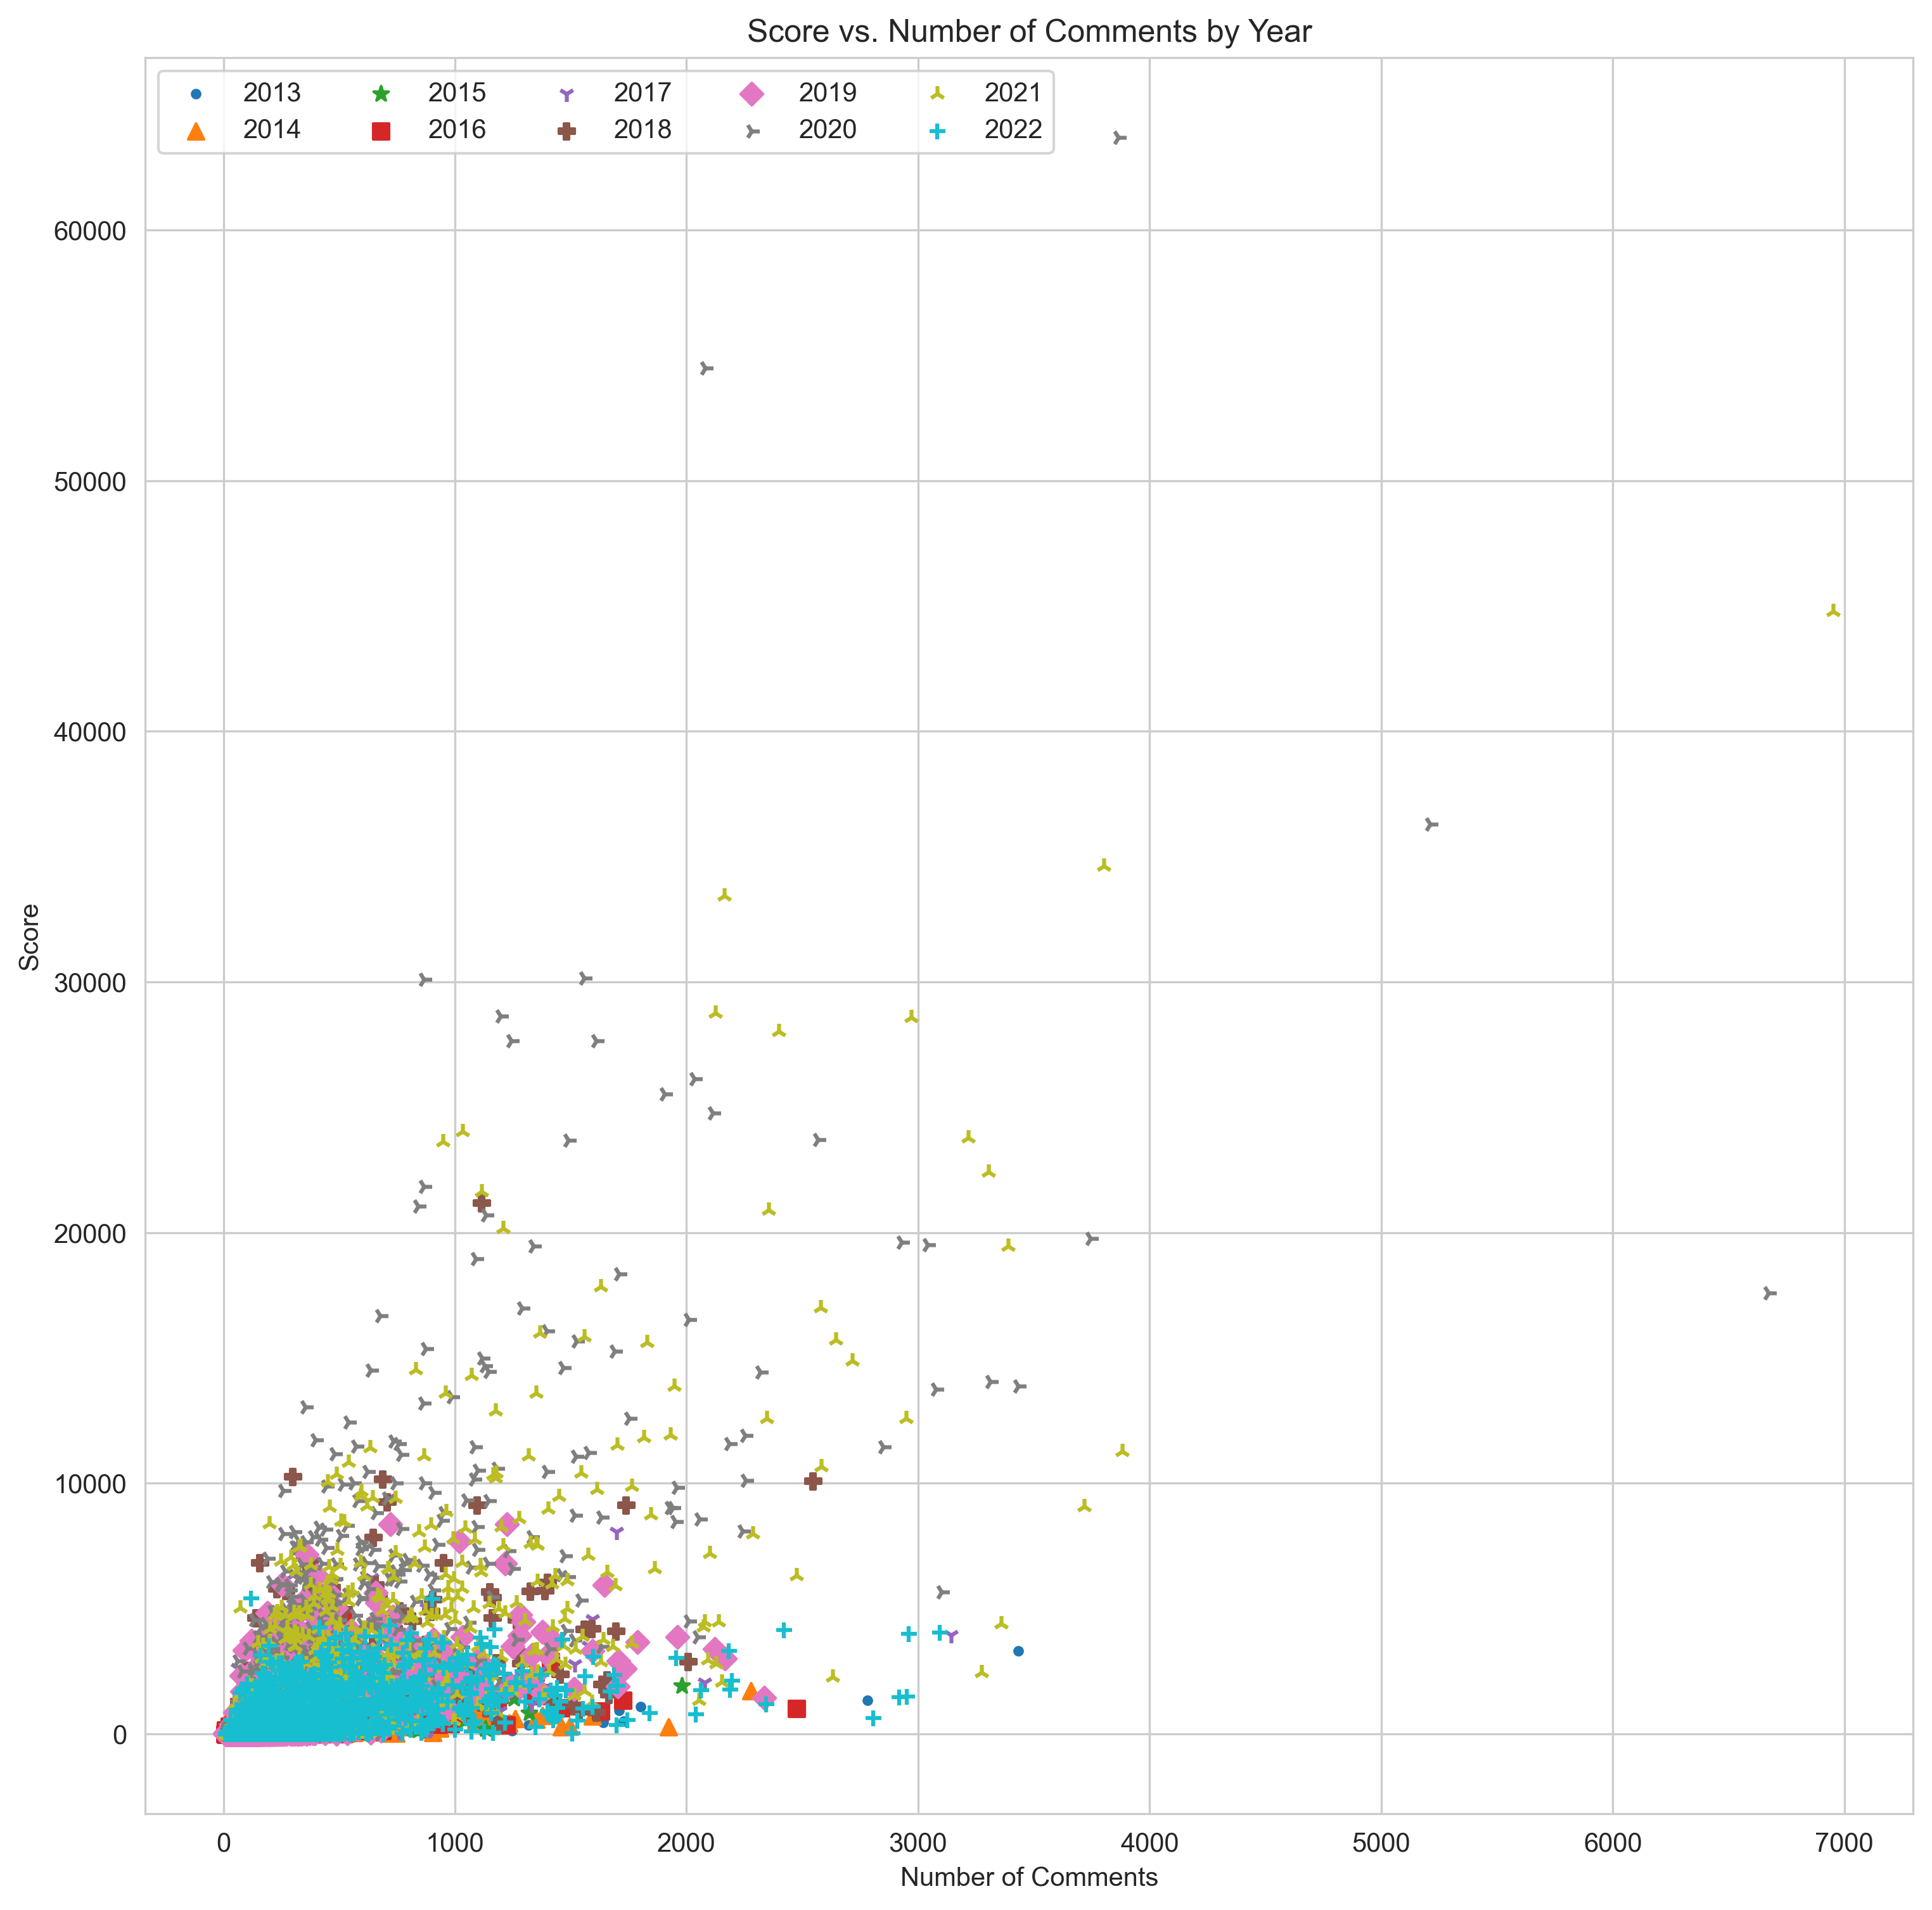

In [217]:
markers = ['.','^', '*', 's', '1', 'P', 'D', '4', '2', '+']
fig, ax = plt.subplots(figsize=(12,12), dpi=300)

# Create a scatter plot of score vs. num_comments for each year
for idx, (year, group) in enumerate(grouped_posts_year):
    plt.scatter(group['num_comments'], group['score'], marker=markers[idx], label=year)
plt.xlabel('Number of Comments')
plt.ylabel('Score')
plt.title('Score vs. Number of Comments by Year')
plt.legend(loc='best',ncol=5)
plt.show()

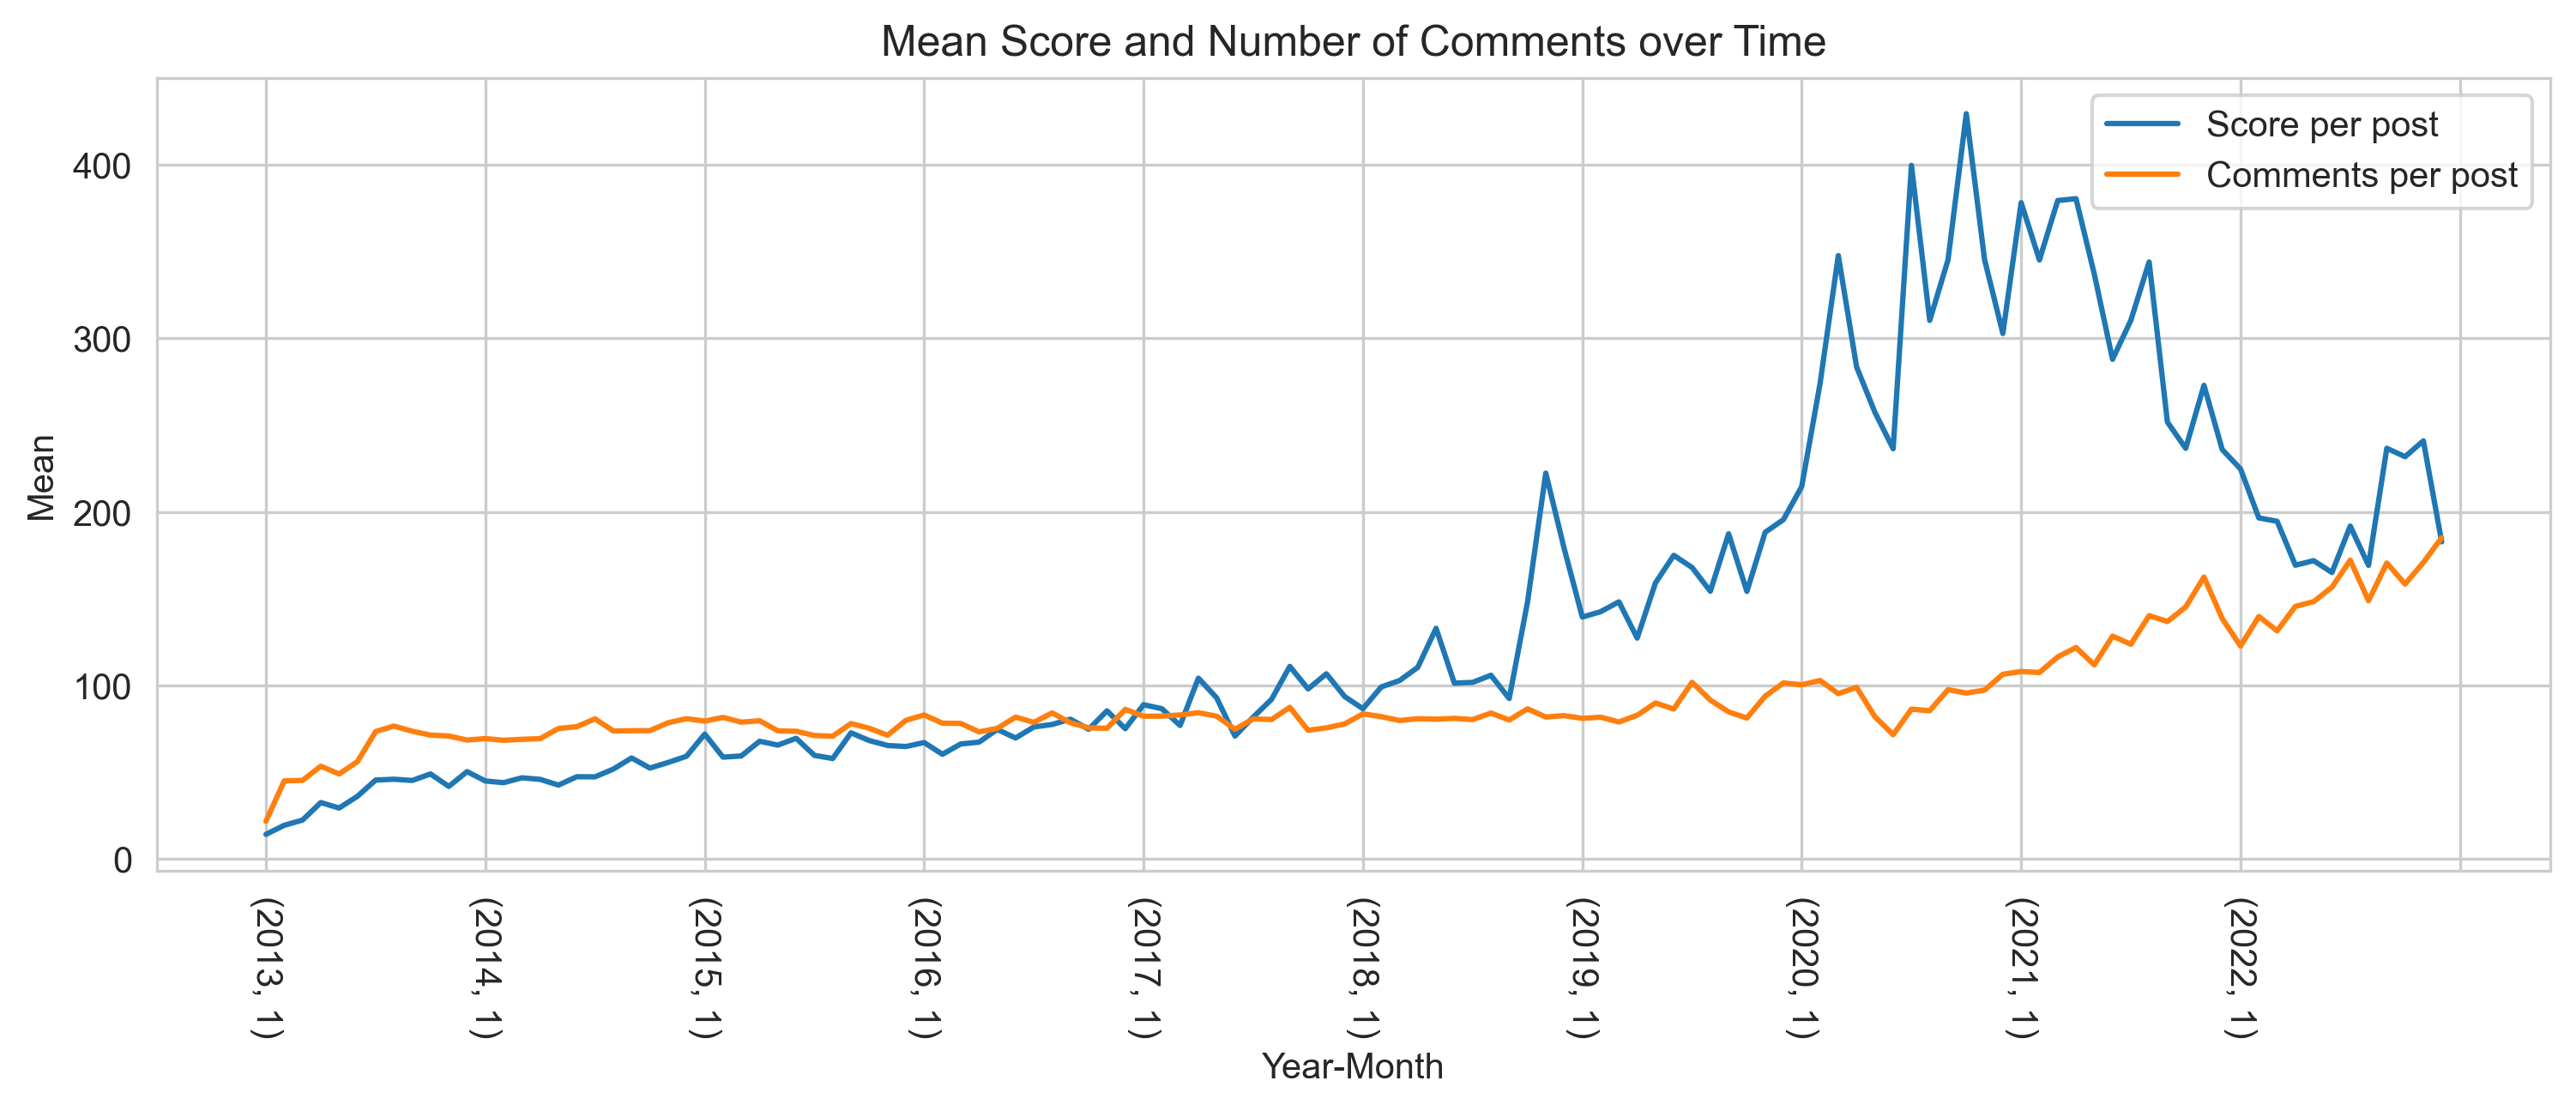

In [215]:
fig, ax = plt.subplots(figsize=(12,4), dpi=300)
# Create a line plot of score and num_comments over time
plt.plot(mean_score_month.values, label='Score per post')
plt.plot(mean_comments_month.values, label='Comments per post')

plt.xticks(np.arange(len(mean_score_month.values)), mean_score_month.index, rotation=270)
ax.xaxis.set_major_locator(MultipleLocator(12.0))
plt.xlabel('Year-Month')
plt.ylabel('Mean')
plt.title('Mean Score and Number of Comments over Time')
plt.legend()
plt.show()

In [209]:
len(mean_score_month.values)

120

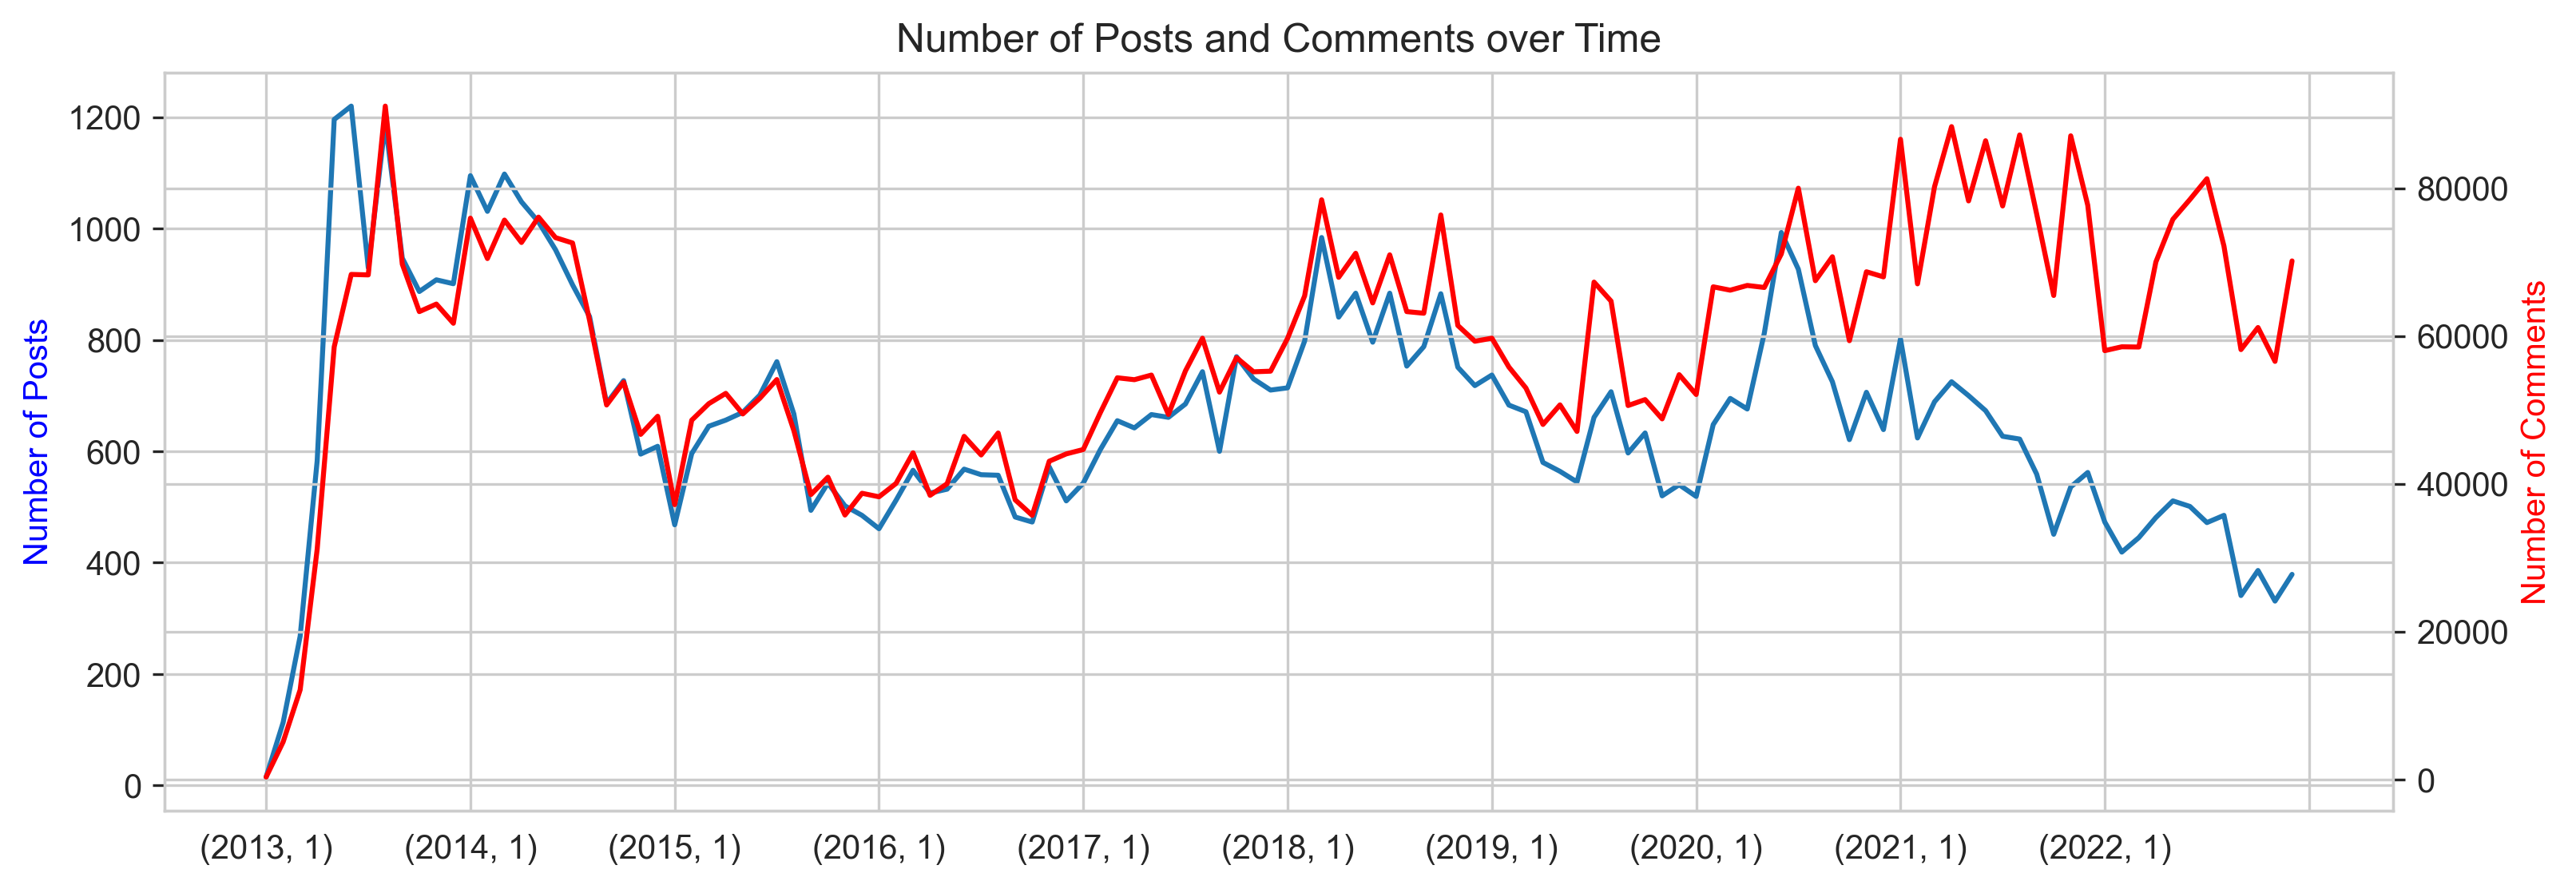

In [228]:
# Create a line plot of num_posts and num_comments over time
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

ax.plot(num_posts_month.values, label='Number of Posts')


ax2 = ax.twinx()

ax2.plot(sum_comments_month.values, color='red', label='Number of Comments')

plt.xticks(np.arange(len(sum_comments_month.values)), sum_comments_month.index, rotation=270)
ax.xaxis.set_major_locator(MultipleLocator(12.0))
ax2.xaxis.set_major_locator(MultipleLocator(12.0))
plt.xlabel('Year-Month')
ax.set_ylabel('Number of Posts', color='blue')
ax2.set_ylabel('Number of Comments', color='red')
plt.title('Number of Posts and Comments over Time')
# plt.yscale('log')
# plt.legend()
plt.show()

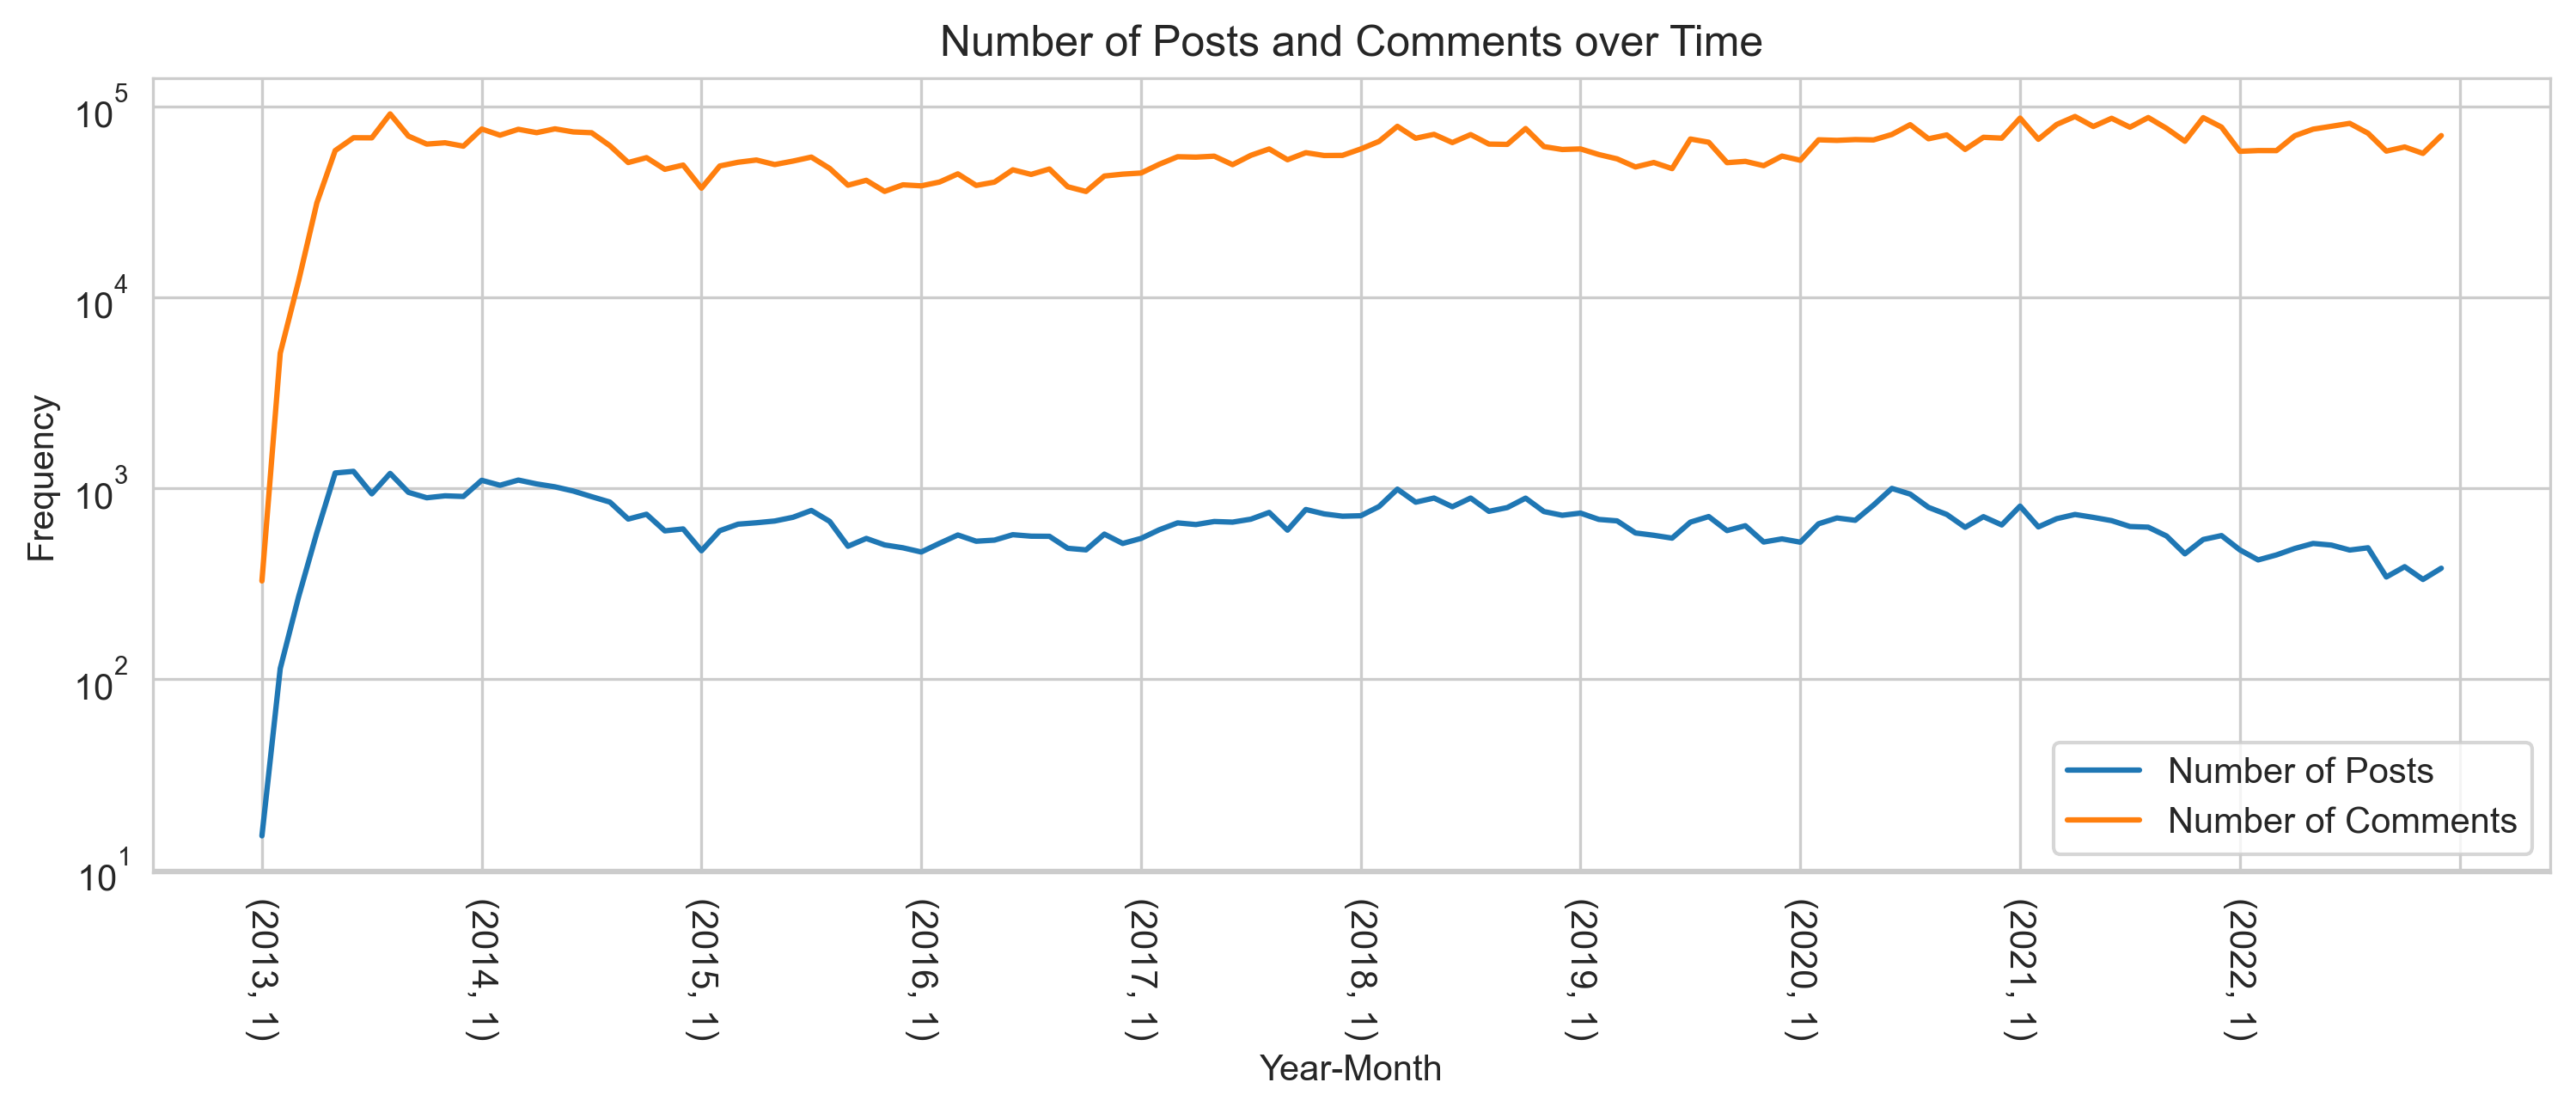

In [231]:
# Create a line plot of num_posts and num_comments over time
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

plt.plot(num_posts_month.values, label='Number of Posts')


plt.plot(sum_comments_month.values, label='Number of Comments')

plt.xticks(np.arange(len(sum_comments_month.values)), sum_comments_month.index, rotation=270)
ax.xaxis.set_major_locator(MultipleLocator(12.0))
plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.title('Number of Posts and Comments over Time')
plt.yscale('log')
plt.legend()
plt.show()

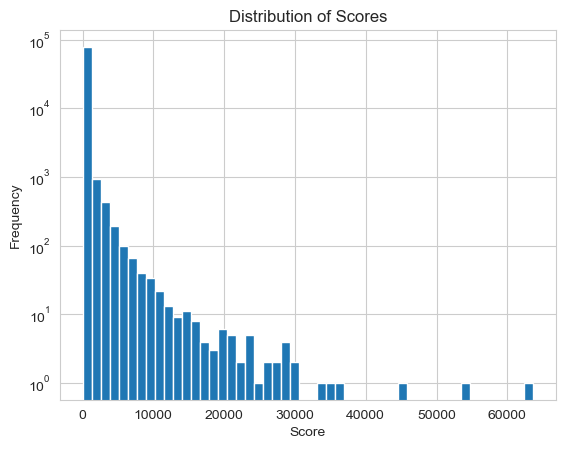

In [188]:
#Score VS Frequency
plt.hist(posts['score'], bins=50)
plt.yscale('log')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.show()

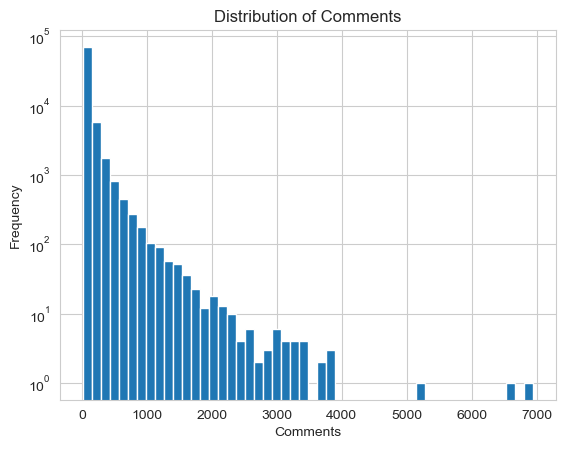

In [189]:
#Comments VS Frequency
plt.hist(posts['num_comments'], bins=50)
plt.yscale('log')
plt.xlabel('Comments')
plt.ylabel('Frequency')
plt.title('Distribution of Comments')
plt.show()

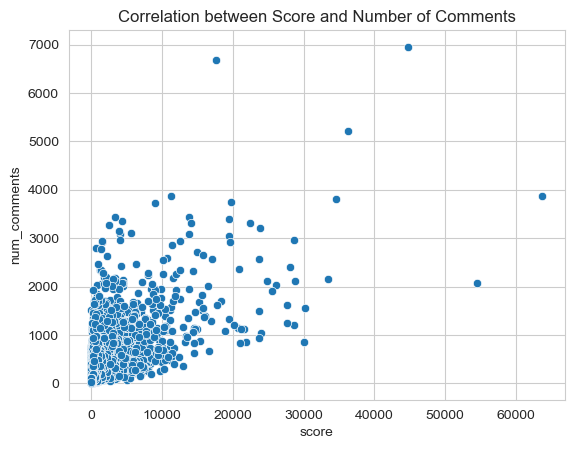

In [190]:
#Score VS Commnets
sns.scatterplot(x='score', y='num_comments', data=posts)
plt.title('Correlation between Score and Number of Comments')
plt.show()

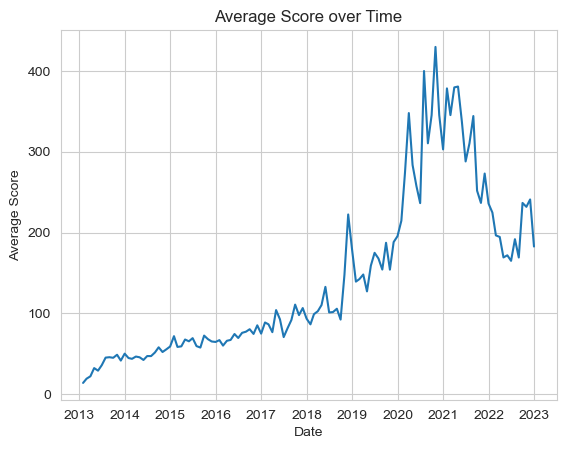

In [191]:
posts['created_utc'] = pd.to_datetime(posts['created_utc'])
posts.set_index('created_utc', inplace=True)

mean_score_month_ = posts['score'].resample('M').mean()

plt.plot(mean_score_month_.index, mean_score_month_.values)
plt.xlabel('Date')
plt.ylabel('Average Score')
plt.title('Average Score over Time')
plt.show()

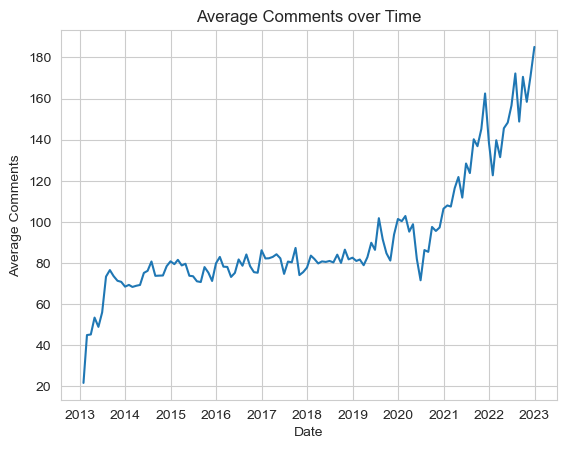

In [192]:
# posts['created_utc'] = pd.to_datetime(posts['created_utc'])
# posts.set_index('created_utc', inplace=True)

mean_comments_month_ = posts['num_comments'].resample('M').mean()

plt.plot(mean_comments_month_.index, mean_comments_month_.values)
plt.xlabel('Date')
plt.ylabel('Average Comments')
plt.title('Average Comments over Time')
plt.show()

In [193]:
# Calculate sum and mean of score for the entire 10 years
sum_year = posts['score'].sum()
mean_year = posts['score'].mean()

# Print the results
print("\nSum of scores for 10 years:", sum_year)
print("Mean of scores for 10 years:", mean_year)



Sum of scores for 10 years: 11119848.0
Mean of scores for 10 years: 138.9147511493104
